In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input
import pickle
from tensorflow.keras.models import load_model

In [60]:
train_dir = 'train dataset'
test_dir = 'test dataset'
val_dir = 'validation dataset'

In [61]:
num_classes = 21
image_size = (224, 224)
batch_size = 128
epochs = 10

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7350 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [63]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

In [64]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [65]:
model = Model(inputs=base_model.input, outputs=predictions)

In [66]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
57/57 [==============================] - 607s 11s/step - loss: 1.7368 - accuracy: 0.4790 - val_loss: 0.4912 - val_accuracy: 0.8638
Epoch 2/10
57/57 [==============================] - 605s 11s/step - loss: 0.9142 - accuracy: 0.7017 - val_loss: 0.3772 - val_accuracy: 0.8872
Epoch 3/10
57/57 [==============================] - 612s 11s/step - loss: 0.7832 - accuracy: 0.7448 - val_loss: 0.3490 - val_accuracy: 0.8892
Epoch 4/10
57/57 [==============================] - 611s 11s/step - loss: 0.7047 - accuracy: 0.7671 - val_loss: 0.2965 - val_accuracy: 0.9048
Epoch 5/10
57/57 [==============================] - 603s 11s/step - loss: 0.6684 - accuracy: 0.7801 - val_loss: 0.2836 - val_accuracy: 0.9087
Epoch 6/10
57/57 [==============================] - 596s 11s/step - loss: 0.6180 - accuracy: 0.7919 - val_loss: 0.2525 - val_accuracy: 0.9155
Epoch 7/10
57/57 [==============================] - 592s 10s/step - loss: 0.6134 - accuracy: 0.7930 - val_loss: 0.2474 - val_accuracy: 0.9229
Epoch 

In [69]:
test_steps = len(test_generator)
test_generator.reset()
predictions = model.predict(test_generator, steps=test_steps, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

9/9 [==============================] - 66s 7s/step


In [70]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.96      0.94      0.95        50
           2       1.00      0.86      0.92        50
           3       0.96      0.96      0.96        50
           4       0.89      0.80      0.84        50
           5       1.00      1.00      1.00        50
           6       0.87      0.40      0.55        50
           7       0.91      1.00      0.95        50
           8       0.94      0.98      0.96        50
           9       0.82      0.94      0.88        50
          10       1.00      0.98      0.99        50
          11       0.92      0.90      0.91        50
          12       0.67      0.92      0.77        50
          13       0.79      0.90      0.84        50
          14       0.93      1.00      0.96        50
          15       1.00      1.00      1.00        50
          16       0.90      0.86      0.88        50
          17       0.98    

In [71]:
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'F1 score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

F1 score: 0.9065
Precision: 0.9171
Recall: 0.9095


In [72]:
image_path = 'test image_path'

In [73]:
image = load_img(image_path, target_size=image_size)
image = img_to_array(image)
image = preprocess_input(image[np.newaxis, ...])

In [74]:
prediction = model.predict(image)
predicted_class_index = np.argmax(prediction)

In [75]:
class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential',
               'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumreesidential', 'mobilehomepark', 'overpass', 'parkinglot',
               'river', 'runway','sparseresidential', 'storagetanks', 'tenniscourt']

predicted_class_name = class_names[predicted_class_index]

In [76]:
print(f'Predicted class: {predicted_class_name}')

Predicted class: denseresidential


In [82]:
plt.figure(figsize=(25, 14))

<Figure size 1800x1008 with 0 Axes>

<Figure size 1800x1008 with 0 Axes>

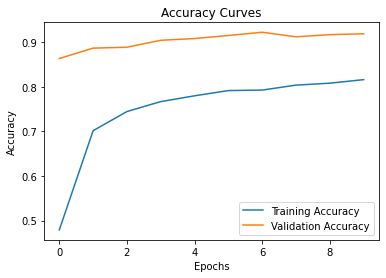

In [102]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

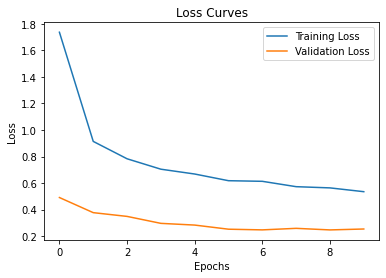

In [105]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [106]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [119]:
model.save('DenseNet.h5')